# Univariate Time Series Forecast with Prophet

### Environment Setup

In [75]:
import pickle
import sys

In [76]:
!{sys.executable} -m pip install -U pystan==2.19.1.1 prophet plotly

In [77]:
model_file_path = './data/featurized_market_data.p' 

with open(model_file_path, 'rb') as fp:
    featurized_market_data = pickle.load(fp)

In [78]:
pair_name = 'DOGE_BTC'
pair_data = featurized_market_data[pair_name]

# This dataset contains open, close, high, low, volume and any numerical features / indicators you like.
price_movement_df = pair_data.iloc[-1000:,:]

### Prepare Data

In [79]:
price_movement_df['ds'] = price_movement_df['time']
price_movement_df['y'] = price_movement_df['close']

price_movement_df[['ds', 'y']].head()

/var/folders/kg/yc3v1y_96vj9m5s_743c5vn00000gn/T/ipykernel_71878/709427258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_movement_df['ds'] = price_movement_df['time']
/var/folders/kg/yc3v1y_96vj9m5s_743c5vn00000gn/T/ipykernel_71878/709427258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_movement_df['y'] = price_movement_df['close']


,ds,y
18833,2021-08-29 21:00:00,0.000006
18834,2021-08-29 22:00:00,0.000006
18835,2021-08-29 23:00:00,0.000006
18836,2021-08-30 00:00:00,0.000006
18837,2021-08-30 01:00:00,0.000006


### Train

In [80]:
from prophet import Prophet

In [81]:
model = Prophet(interval_width=0.95, daily_seasonality=True)

In [82]:
model.fit(price_movement_df[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -2.47608


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3535.97    0.00852124       376.698           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3570.38     0.0472998       3611.61           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3581.92    0.00485695       377.689           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3594.66    0.00104301       293.912           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     463        3602.7   3.58629e-05       243.884   1.522e-07       0.001      601  LS failed, Hessian reset 
     499       3606.97    0.00159978       358.877      0.6514      0.6514      6

### Forecast & Visualize

In [83]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

forecast.head()

 89%|████████▊ | 86/97 [42:56<05:29, 29.96s/it]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-29 21:00:00,0.000006,0.000006,0.000006,0.000006,0.000006,-1.589880e-08,-1.589880e-08,-1.589880e-08,4.122584e-09,4.122584e-09,4.122584e-09,-2.002138e-08,-2.002138e-08,-2.002138e-08,0.0,0.0,0.0,0.000006
1,2021-08-29 22:00:00,0.000006,0.000006,0.000006,0.000006,0.000006,-5.543597e-09,-5.543597e-09,-5.543597e-09,1.230734e-08,1.230734e-08,1.230734e-08,-1.785094e-08,-1.785094e-08,-1.785094e-08,0.0,0.0,0.0,0.000006
2,2021-08-29 23:00:00,0.000006,0.000006,0.000006,0.000006,0.000006,1.666894e-09,1.666894e-09,1.666894e-09,1.727888e-08,1.727888e-08,1.727888e-08,-1.561199e-08,-1.561199e-08,-1.561199e-08,0.0,0.0,0.0,0.000006
3,2021-08-30 00:00:00,0.000006,0.000006,0.000006,0.000006,0.000006,2.241195e-09,2.241195e-09,2.241195e-09,1.555127e-08,1.555127e-08,1.555127e-08,-1.331008e-08,-1.331008e-08,-1.331008e-08,0.0,0.0,0.0,0.000006
4,2021-08-30 01:00:00,0.000006,0.000006,0.000006,0.000006,0.000006,-1.673930e-09,-1.673930e-09,-1.673930e-09,9.277476e-09,9.277476e-09,9.277476e-09,-1.095141e-08,-1.095141e-08,-1.095141e-08,0.0,0.0,0.0,0.000006


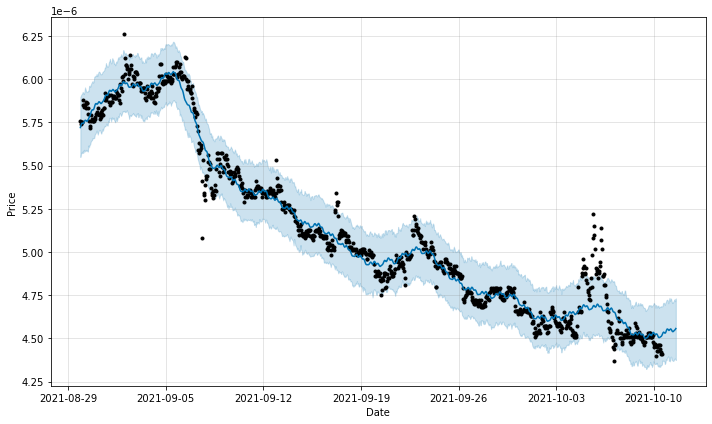

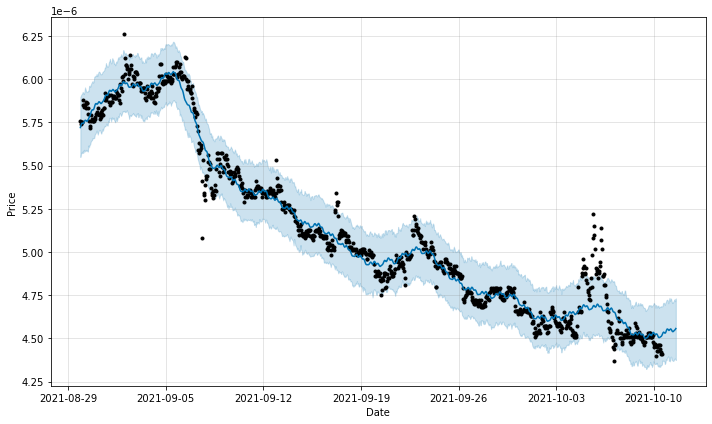

In [84]:
model.plot(forecast, xlabel='Date', ylabel='Price')

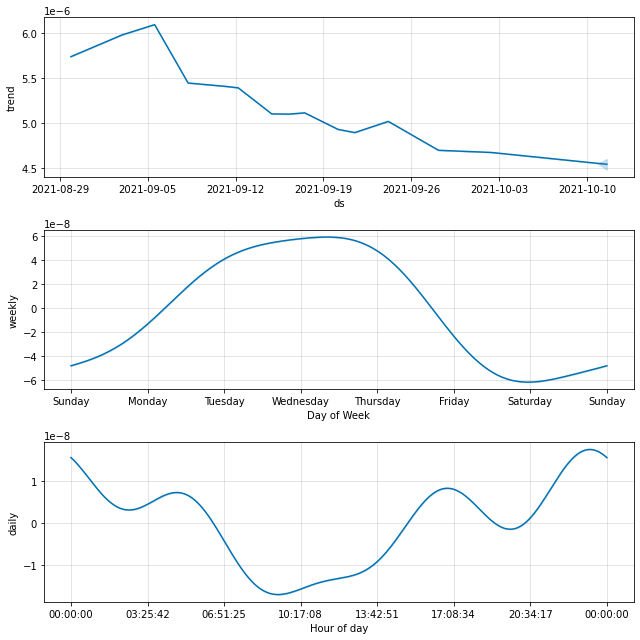

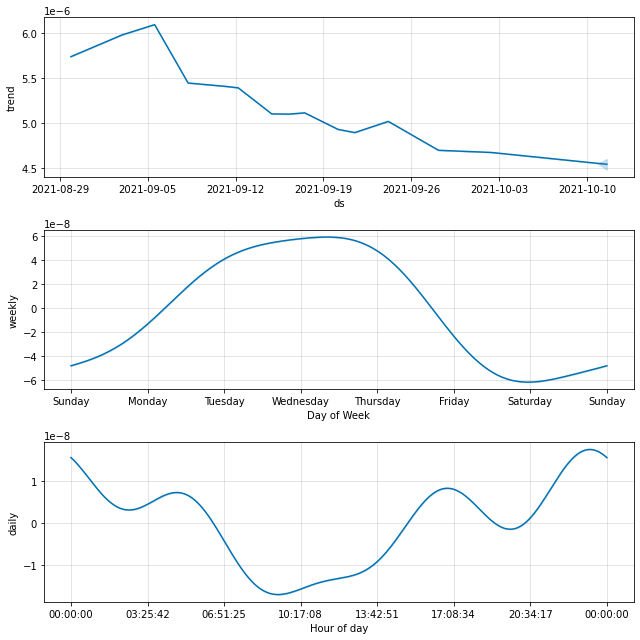

In [85]:
model.plot_components(forecast)